## `1) Introduction:` <a class="anchor" id="1"></a>

`Problem - Statement:` Build an efficient Classification Model that should predict whether it Rains Tomorrow or not, using the dataset **Df in Australia.**

Data source: [Kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package)


## `2) Import Libraries:` <a class="anchor" id="2"></a>

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pickle
%matplotlib inline

In [89]:
import warnings
warnings.filterwarnings('ignore')

In [90]:
pd.set_option("display.max_columns",None)

## `3) Import Data Set`  <a class="anchor" id="3"></a>

In [91]:
df = pd.read_csv('weatherAUS.csv')

In [92]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## `4) Data Preprocessing`  <a class="anchor" id="4"></a>

In [93]:
df.shape

(145460, 23)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

<span style='font-size:15px;'>&#10145; <b>` Cardinality check for Categorical Features:`</b></span>

- Some Machine Learning algorithms e.g. Logistic Regression, Support Vector Machine can not handle categorical variables and expect all variables to be numeric. 


- So, categorical data needs to be encoded to numerical data. Before encoding, we need to make sure that categorical features has minimum cardinality.


- `Cardinality:` The number of unique values in feature column is known as cardinality. Example: A column with hundreds of zip codes is an example of a high cardinality feature


- A high number of unique values within a feature column is known as high cardinality. 


- High cardinality may pose some serious problems in the machine learning model. 


- If a feature column as high cardinality, when we use encoding techniques, then that may cause a significant increase number of dimensions, which is not a good for machine learning problems.


- If there is high cardinality in feature column, then:

    1) Employ `Feature Engineering` to extract new features from the feature which possess high cardinality. (or)

    2) Simply drop the feature, if that feature doesn't add value to model.



`Date` column has high cardinality which poses several problems to ml model in terms of efficency and also dimenionality of data also increases when converted to numerical data.

`Feature enginerring of Date column to decrease high cardinality.`

In [98]:
# Type conversion of Date Column to datetime type:

df['Date'] = pd.to_datetime(df['Date'])

In [99]:
df['Date'].dtype

dtype('<M8[ns]')

In [100]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [101]:
df.drop('Date', axis = 1, inplace = True)

In [102]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


<br>

<span style='font-size:15px;'><b>` Null (or) NaN (or) Missing Values in Data:`</b></span>


The real-world data often has a lot of missing(or null) values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.
<br>

<br>

<span style='font-size:15px;'>&#10145; <b>` Handling Null values in categorical features:`</b></span>

In [103]:
# categorical data: 

categorical_features = [column_name for column_name in df.columns if df[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)

Number of Categorical Features: 6
Categorical Features:  ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [104]:
# Numerical Features:

numerical_features = [column_name for column_name in df.columns if df[column_name].dtype != 'O']
#df.select_dtypes(include=['float64','int64']).columns 
print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)

Number of Numerical Features: 19
Numerical Features:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'year', 'month', 'day']


`Checking for Null values:`

In [105]:
df[categorical_features].isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [106]:
# list of categorical features which has null values:

categorical_features_with_null = [feature for feature in categorical_features if df[feature].isnull().sum()]

`Filling the missing(Null) categorical features with most frequent value(mode)`

In [107]:
# Filling the missing(Null) categorical features with most frequent value(mode)

for each_feature in categorical_features_with_null:
    mode_val = df[each_feature].mode()[0]
    df[each_feature].fillna(mode_val,inplace=True)

In [108]:
df[categorical_features].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

<br>

<span style='font-size:15px;'>&#10145; <b>` Handling Null values in numerical features:`</b></span>

In [109]:
# checking null values in numerical features

df[numerical_features].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
year                 0
month                0
day                  0
dtype: int64

<AxesSubplot:>

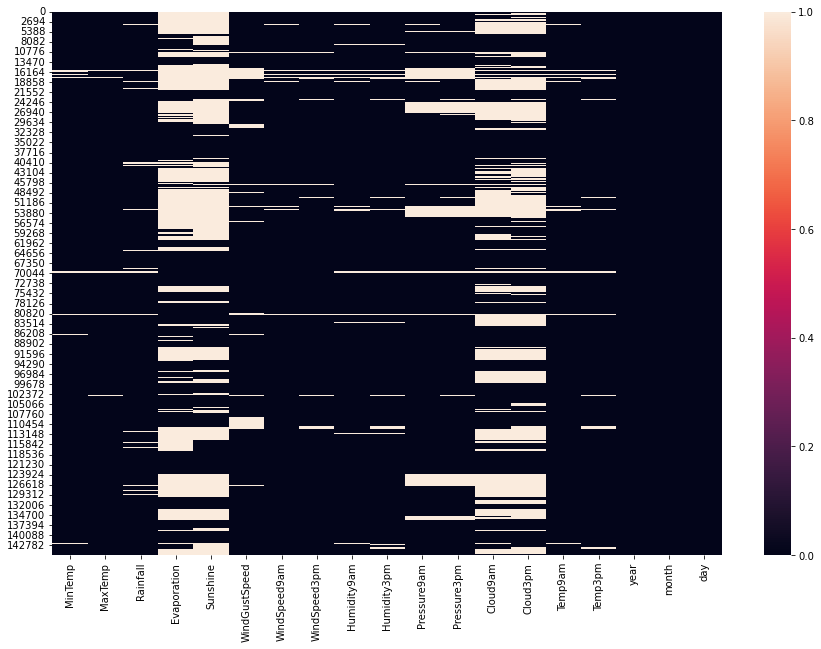

In [110]:
plt.figure(figsize=(15,10))
sns.heatmap(df[numerical_features].isnull(),linecolor='white')

<AxesSubplot:>

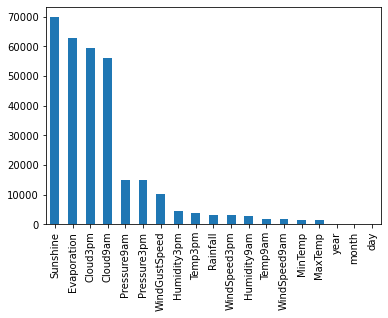

In [111]:
# visualizing the Null values in Numerical Features:

df[numerical_features].isnull().sum().sort_values(ascending = False).plot(kind = 'bar')

<br>

`Null values in Numerical Features can be imputed using Mean and Median. Mean is sensitive to outliers and median is immune to outliers. If you want to impute the null values with mean values, then outliers in numerical features need to be addressed properly.`

<br>

<span style='font-size:15px;'>&#10145; <b>` Checking for outliers in Numerical Features`</b></span>

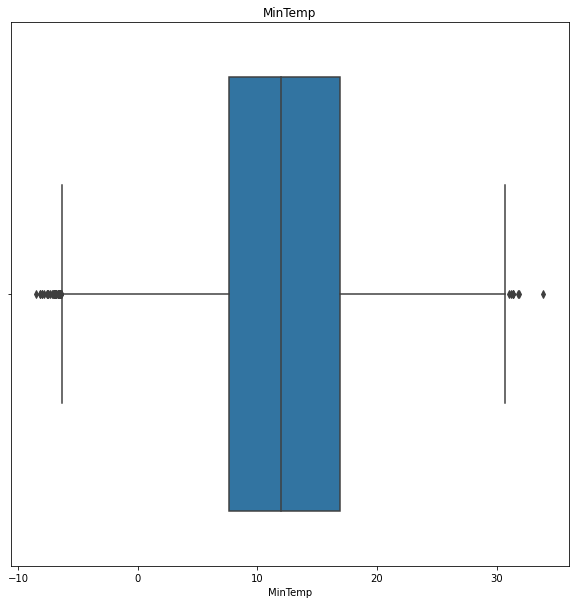

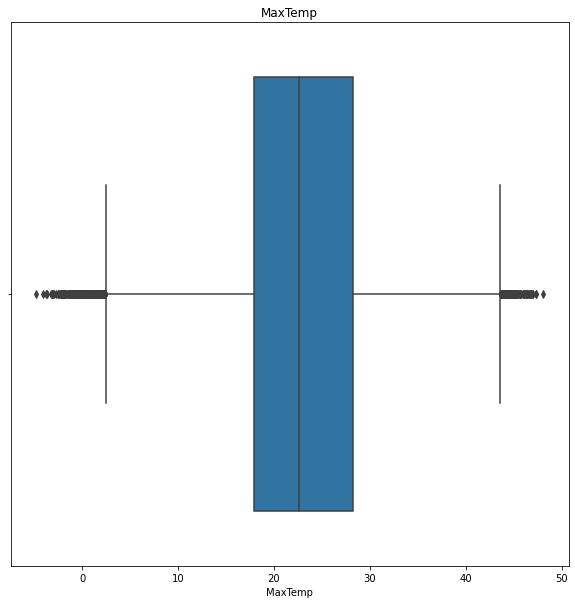

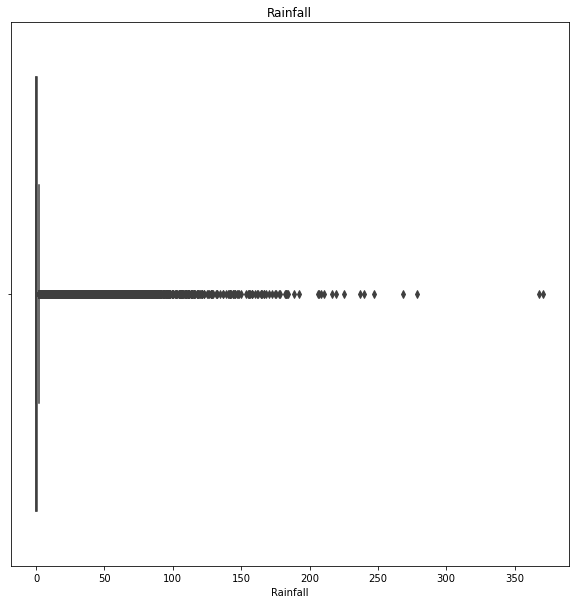

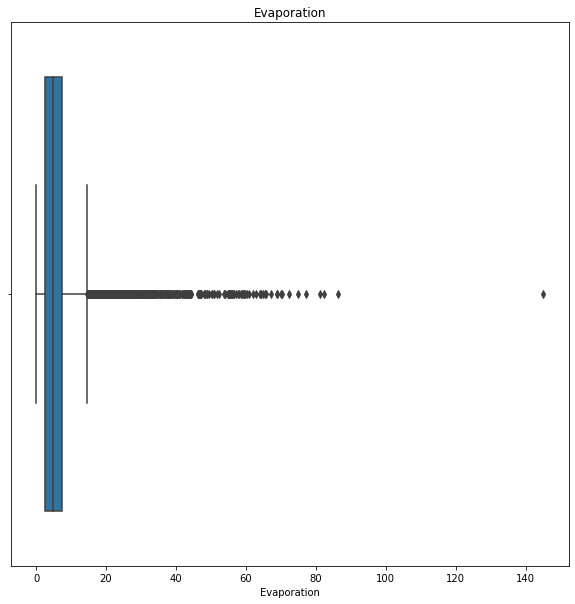

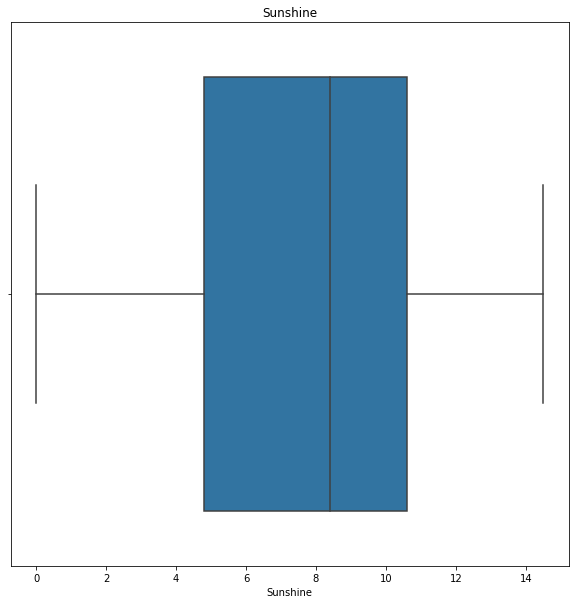

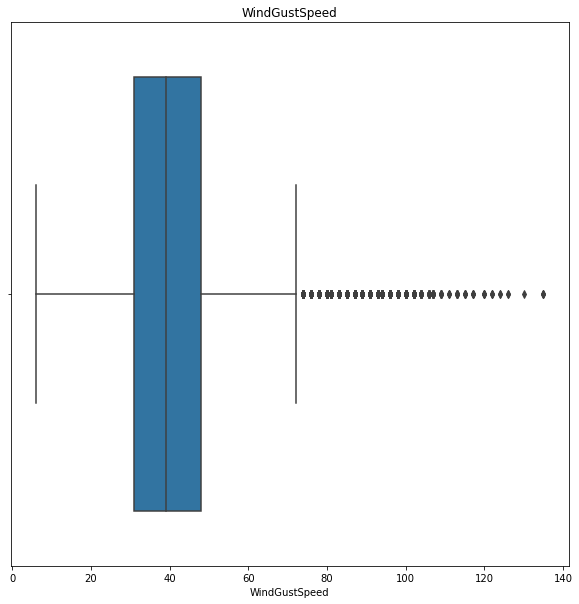

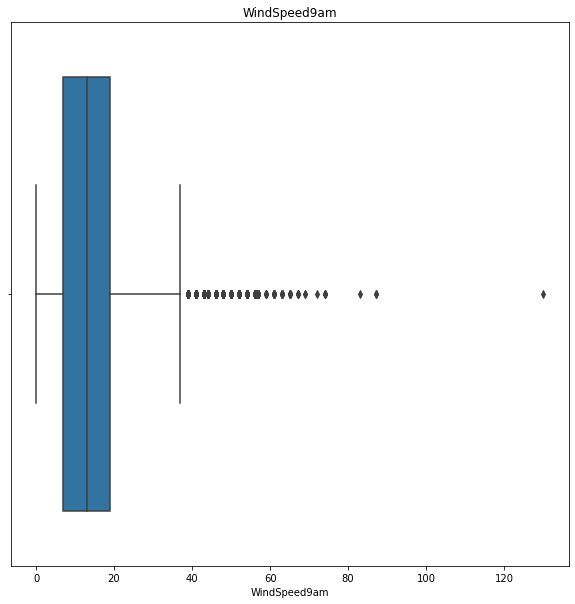

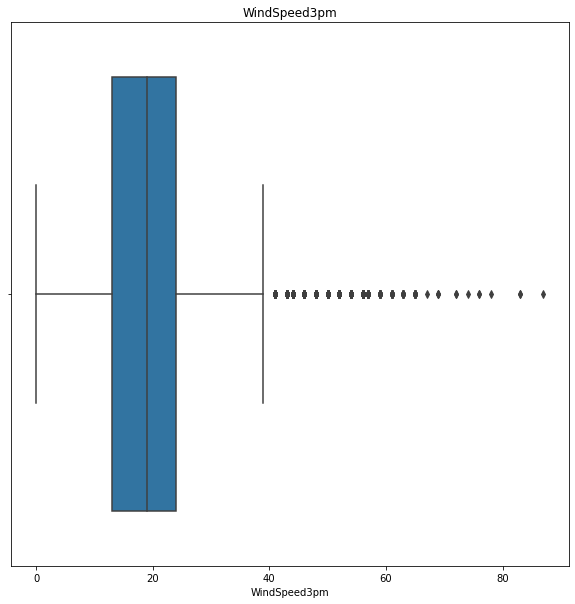

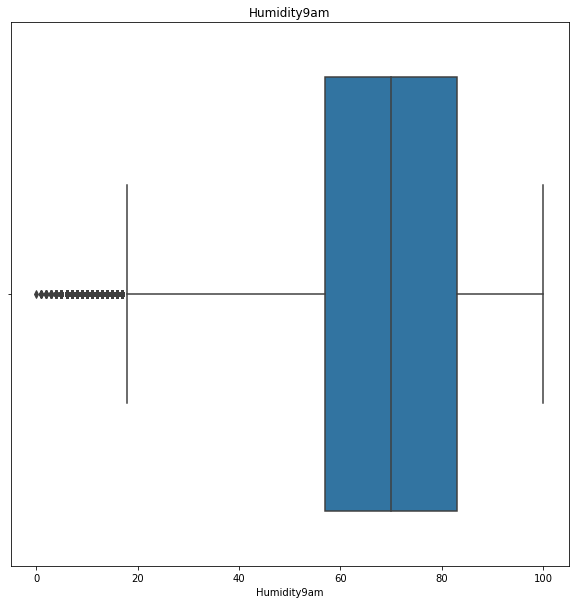

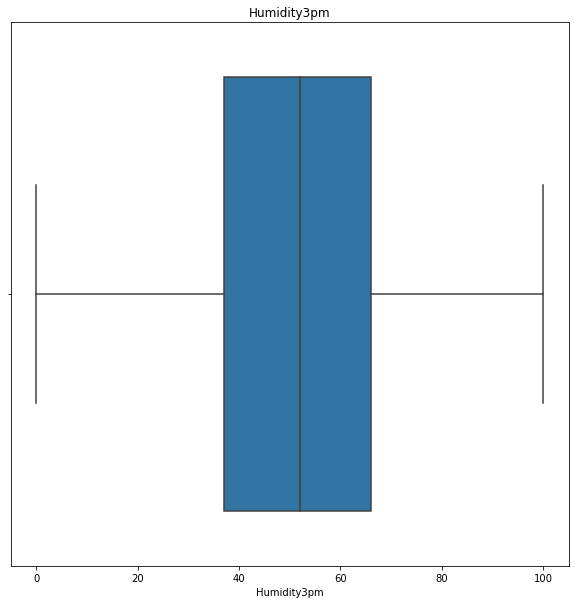

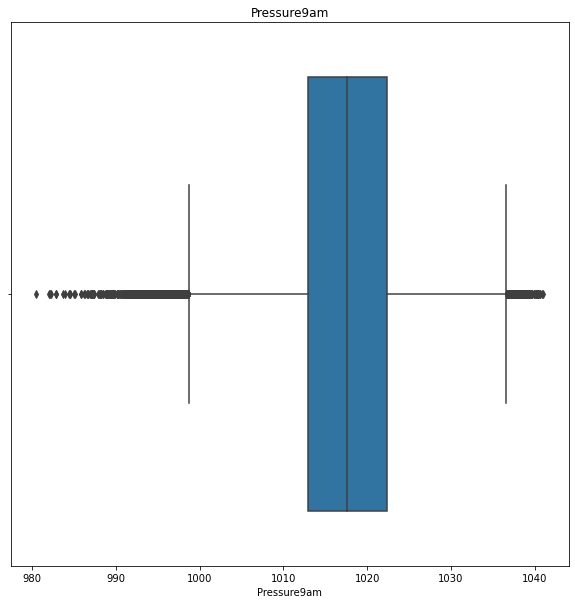

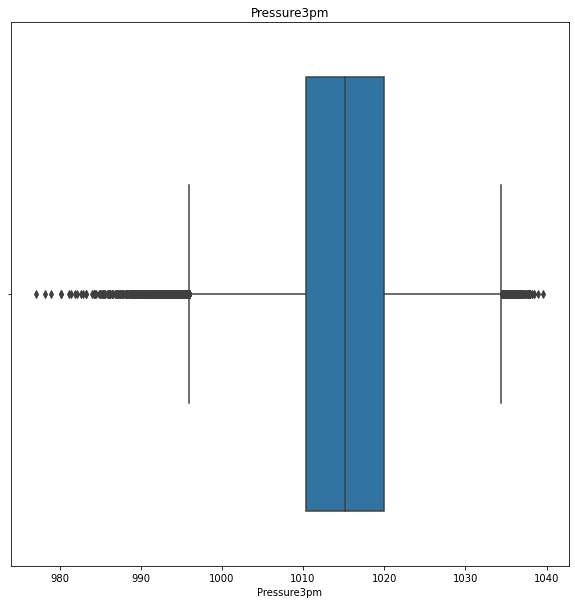

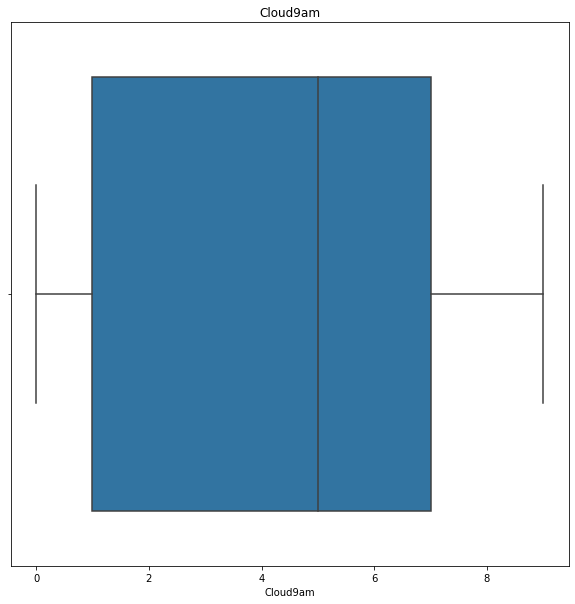

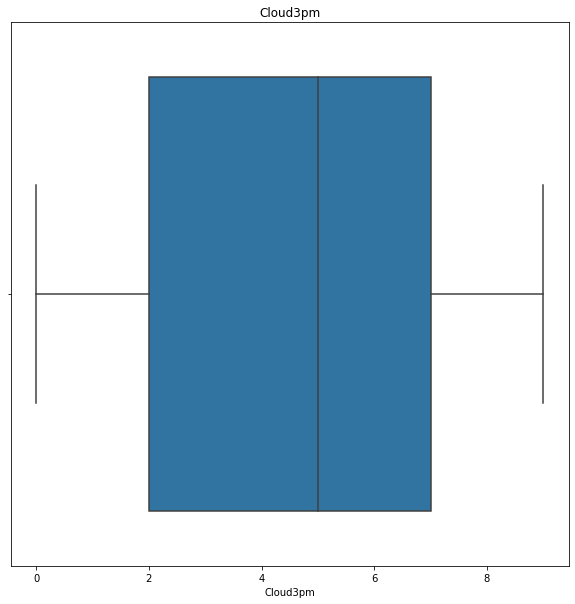

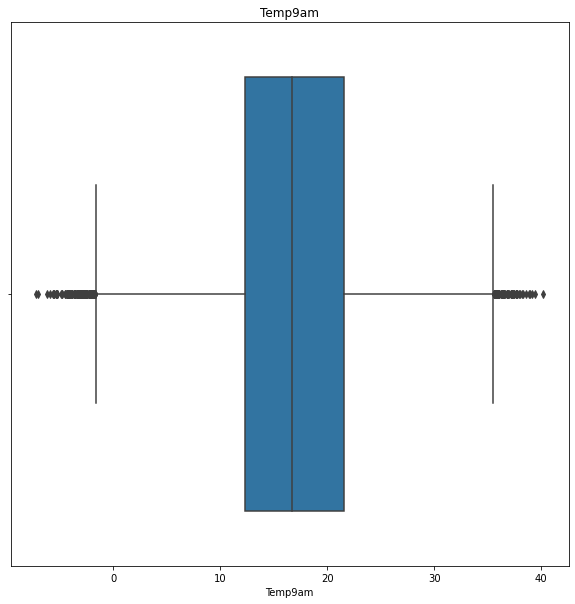

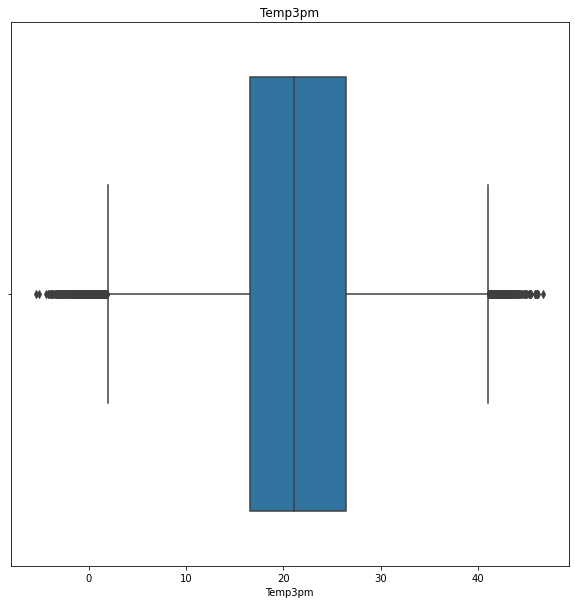

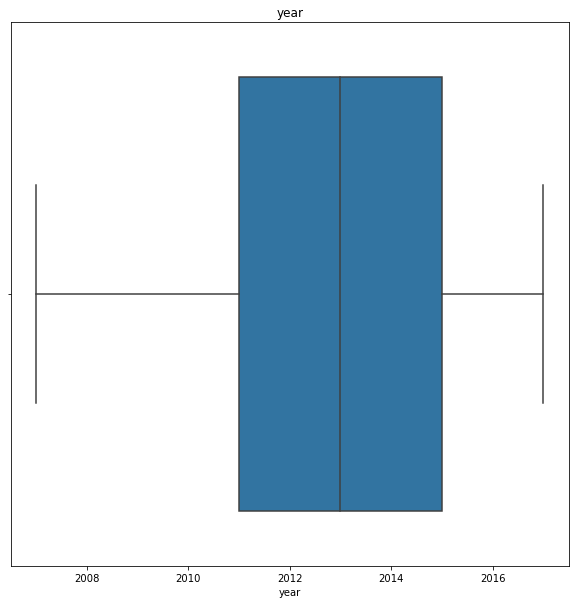

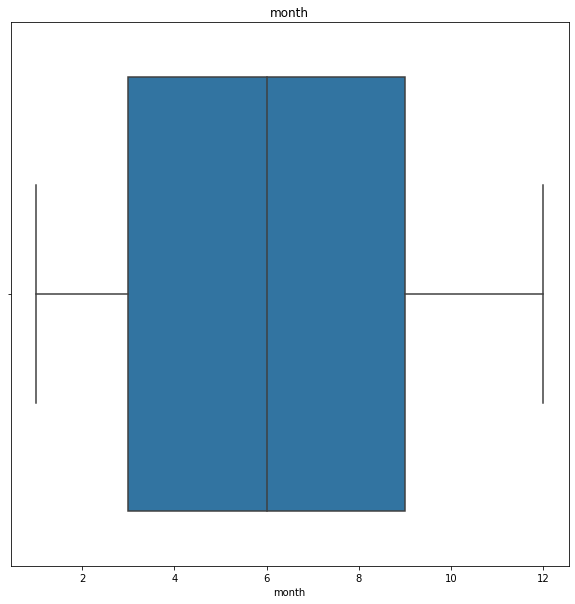

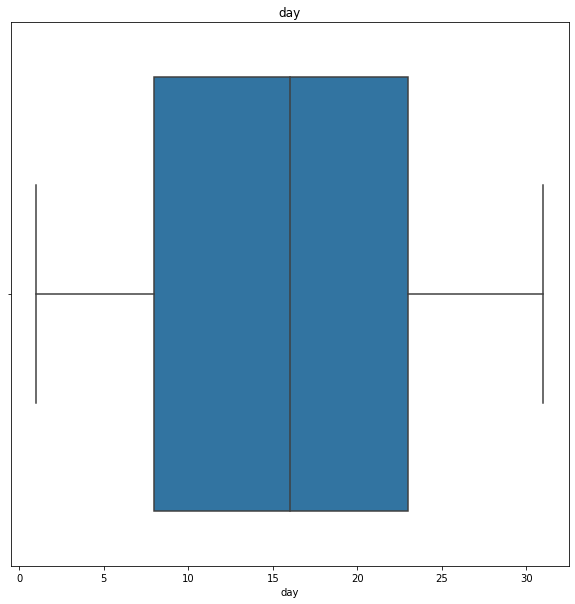

In [112]:
#checking for outliers using Box Plot:

for feature in numerical_features:
    plt.figure(figsize=(10,10))
    sns.boxplot(df[feature])
    plt.title(feature)


In [113]:
# checking for outliers using the statistical formulas:

df[numerical_features].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,day
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,145460.000000,145460.000000,145460.000000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,2012.769751,6.399615,15.712258
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,2.537684,3.427262,8.794789
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,2013.000000,6.000000,16.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,2017.000000,12.000000,31.000000


<br>

`Outlier Treatment to remove outliers from Numerical Features:`

In [114]:
# features which has outliers:

features_with_outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

In [115]:
# Replacing outliers using IQR:

for feature in features_with_outliers:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df[feature]<lower_limit,feature] = lower_limit
    df.loc[df[feature]>upper_limit,feature] = upper_limit

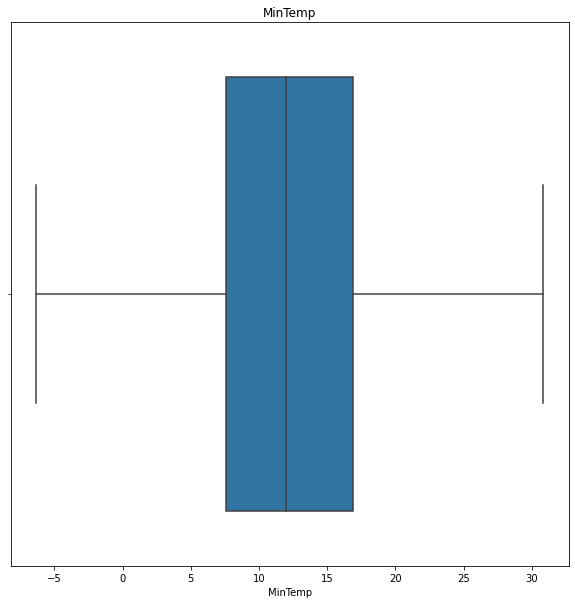

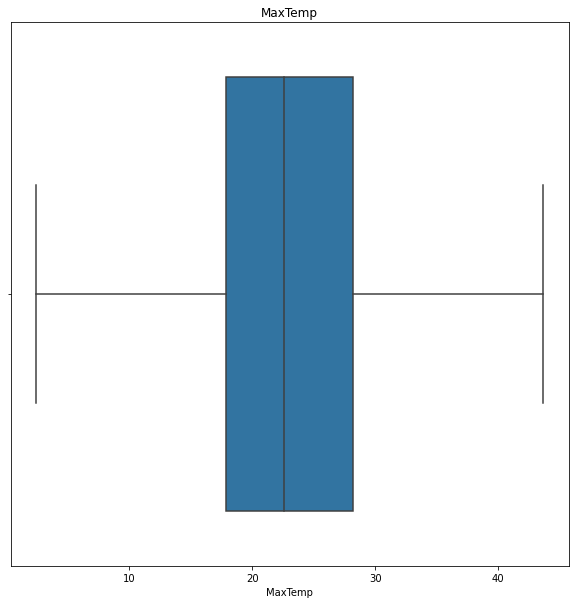

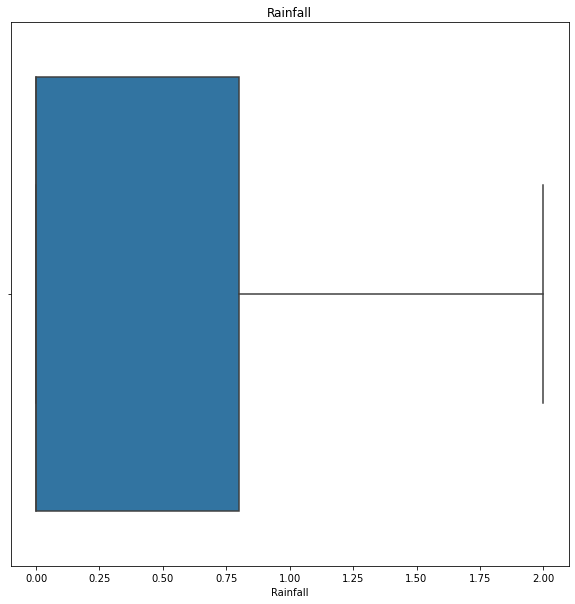

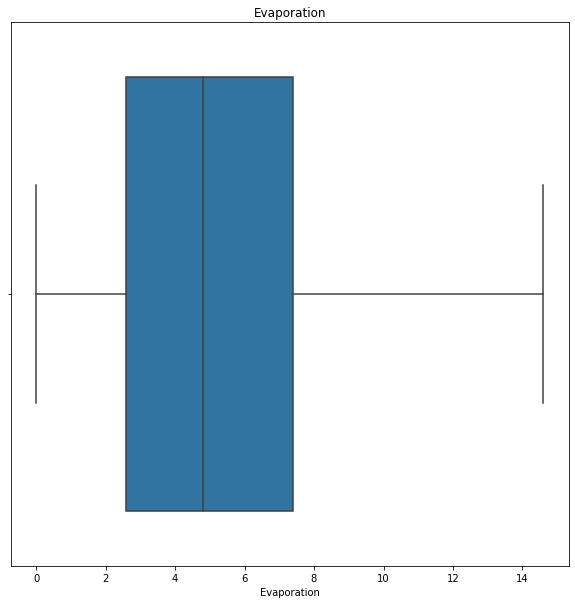

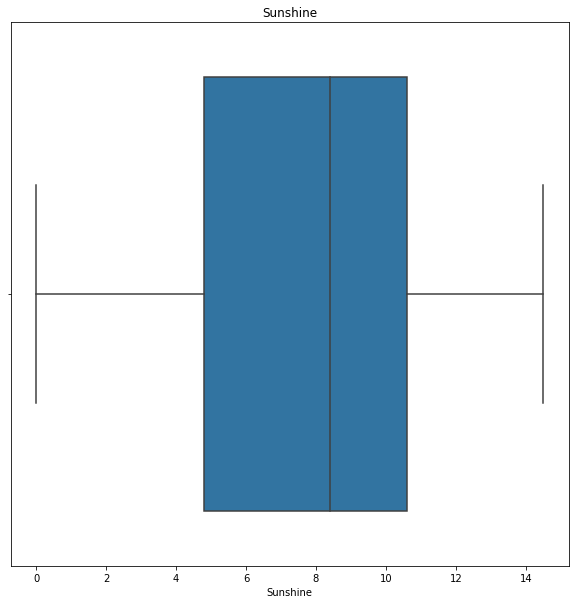

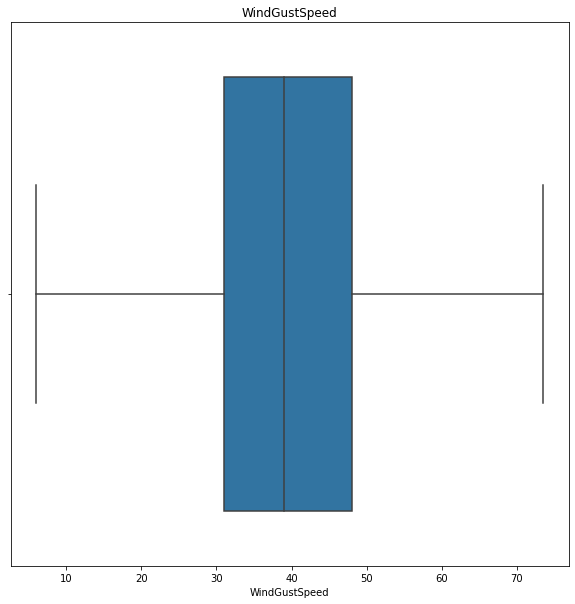

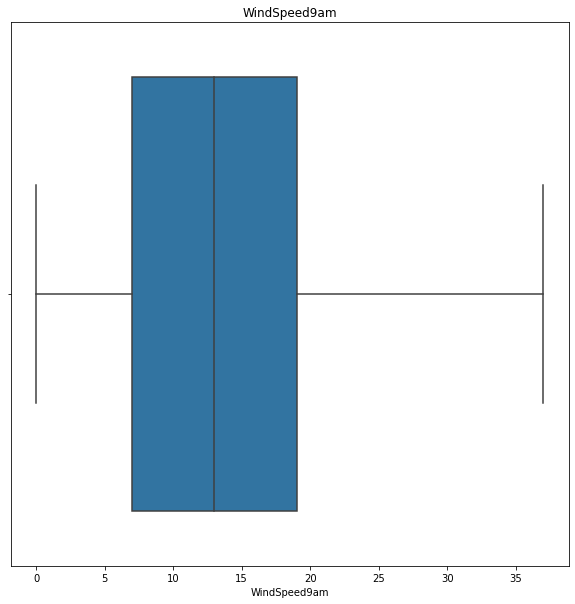

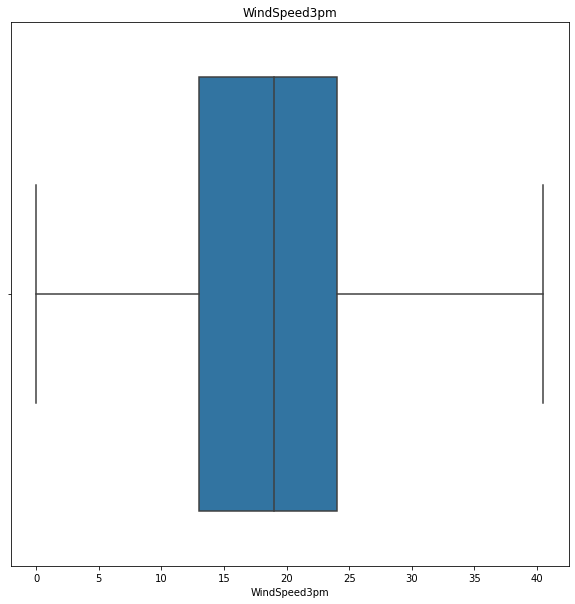

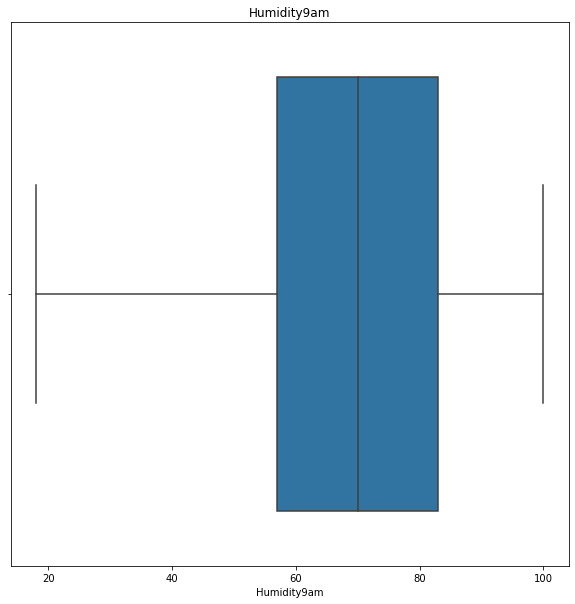

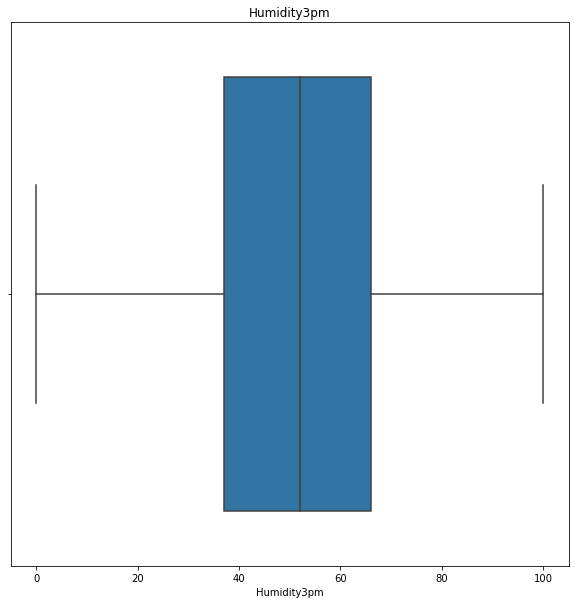

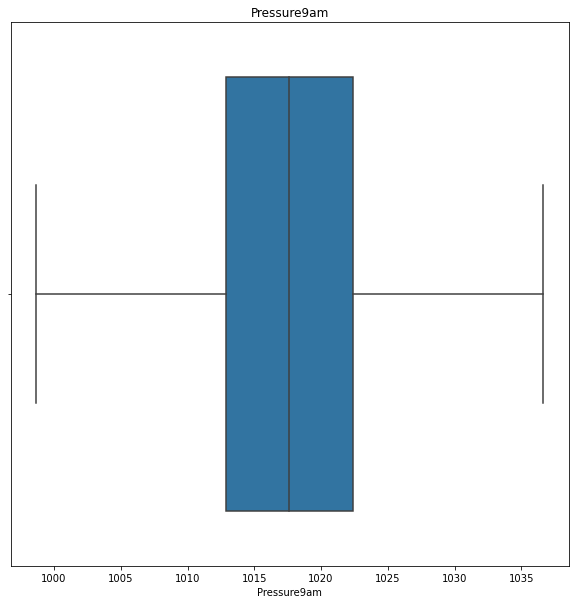

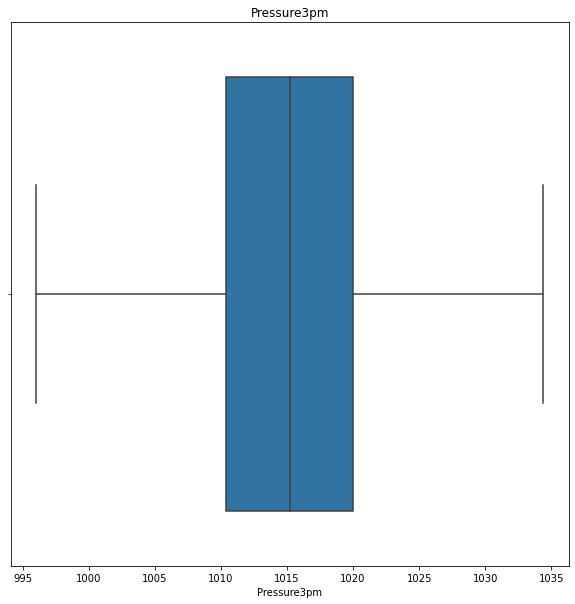

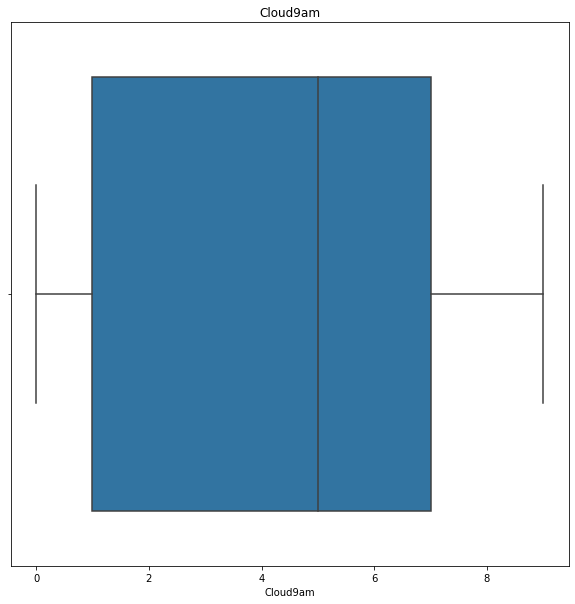

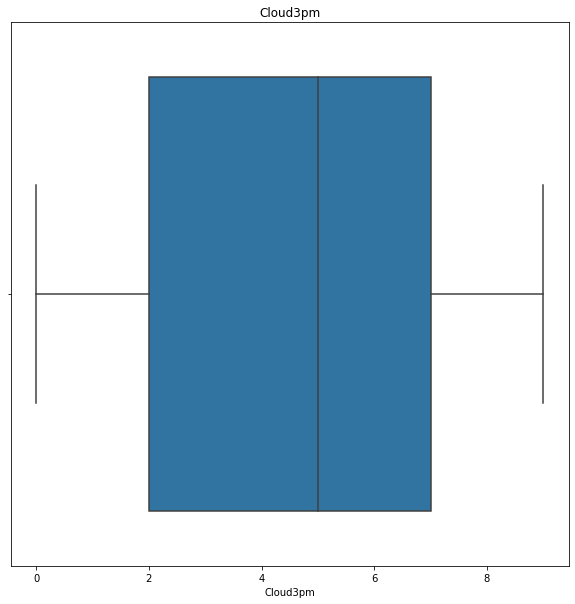

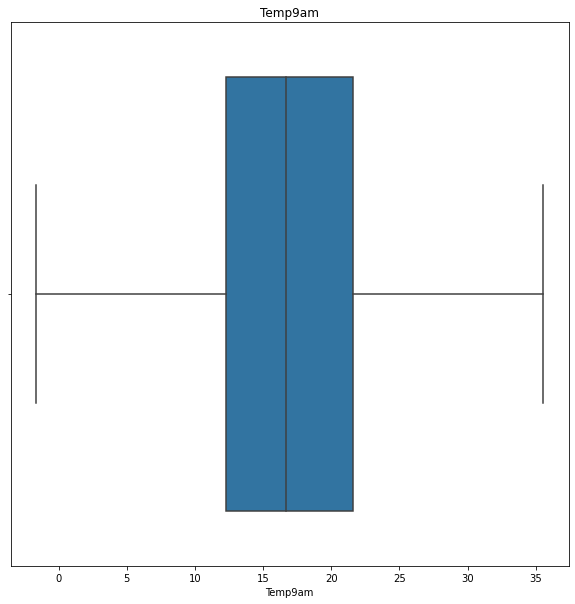

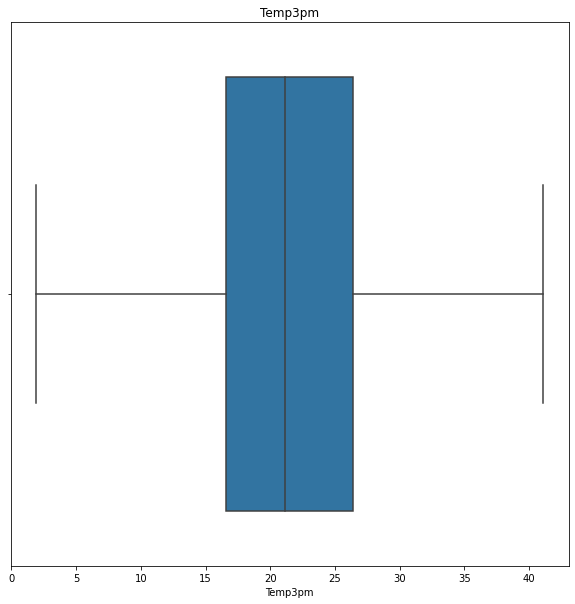

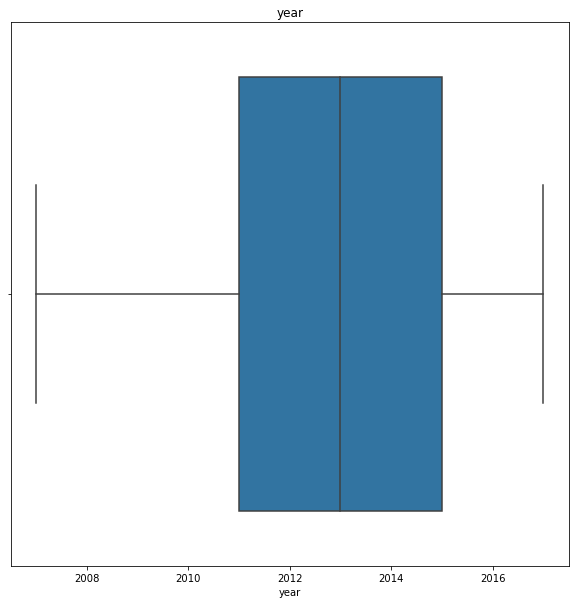

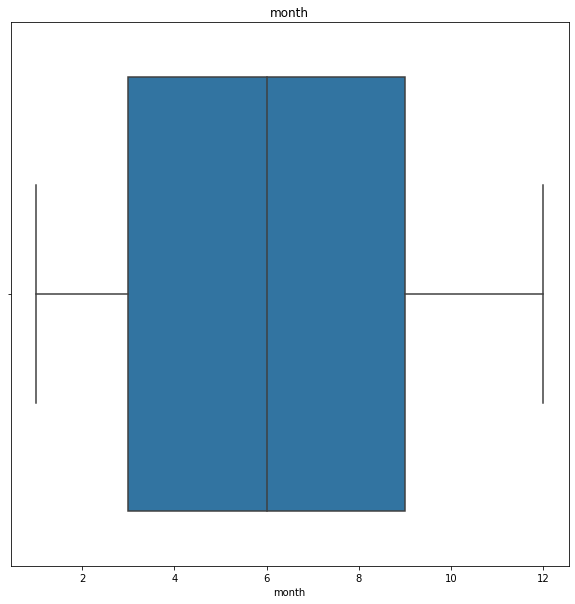

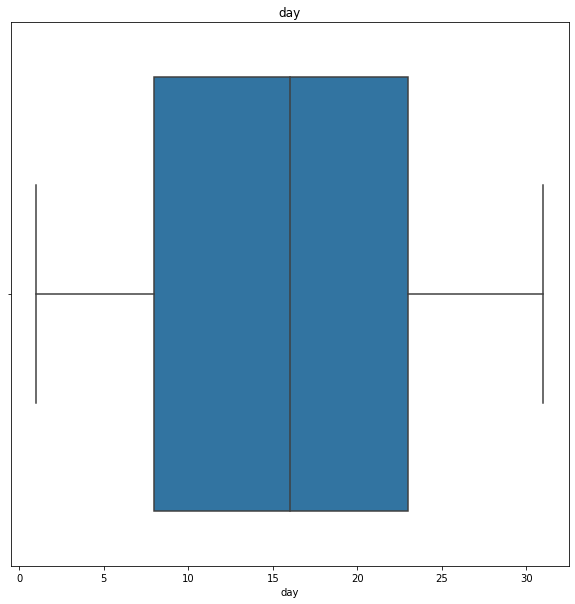

In [116]:
for feature in numerical_features:
    plt.figure(figsize=(10,10))
    sns.boxplot(df[feature])
    plt.title(feature)

<br>

`Imputing null values in numerical features using mean:`

In [117]:
# list of numerical Features with Null values:

numerical_features_with_null = [feature for feature in numerical_features if df[feature].isnull().sum()]
numerical_features_with_null

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [118]:
# Filling null values uisng mean: 

for feature in numerical_features_with_null:
    mean_value = df[feature].mean()
    df[feature].fillna(mean_value,inplace=True)

In [119]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
year             0
month            0
day              0
dtype: int64

In [120]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,5.318667,7.611178,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,5.318667,7.611178,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,5.318667,7.611178,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,5.318667,7.611178,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,5.318667,7.611178,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No,2008,12,5


<br>

<span style='font-size:15px;'>&#10145; <b>` Univariate Analysis`</b></span>

# Exploring RainTomorrow label



<AxesSubplot:>

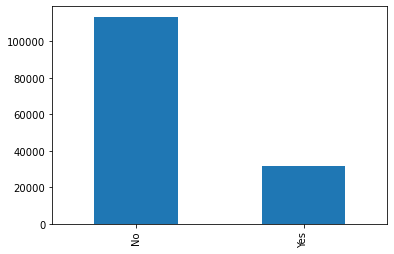

In [121]:
df['RainTomorrow'].value_counts().plot(kind='bar')

In [122]:
#Looks like Target variable is imbalanced. It has more 'No' values. If data is imbalanced, then it might decrease performance of model. As this data is released by the meteorological department of Australia, it doesn't make any sense when we try to balance target variable, because the truthfullness of data might descreases. So, let me keep it as it is.

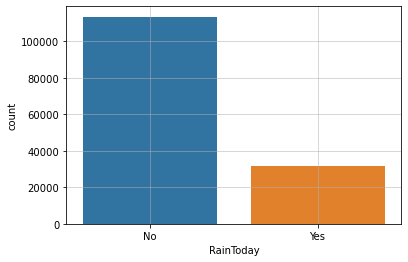

In [123]:
#Exploring RainToday Variable:

sns.countplot(data=df, x="RainToday")
plt.grid(linewidth = 0.5)
plt.show()

<span style='font-size:15px;'>&#10145; <b>` Multivariate Analysis`</b></span>

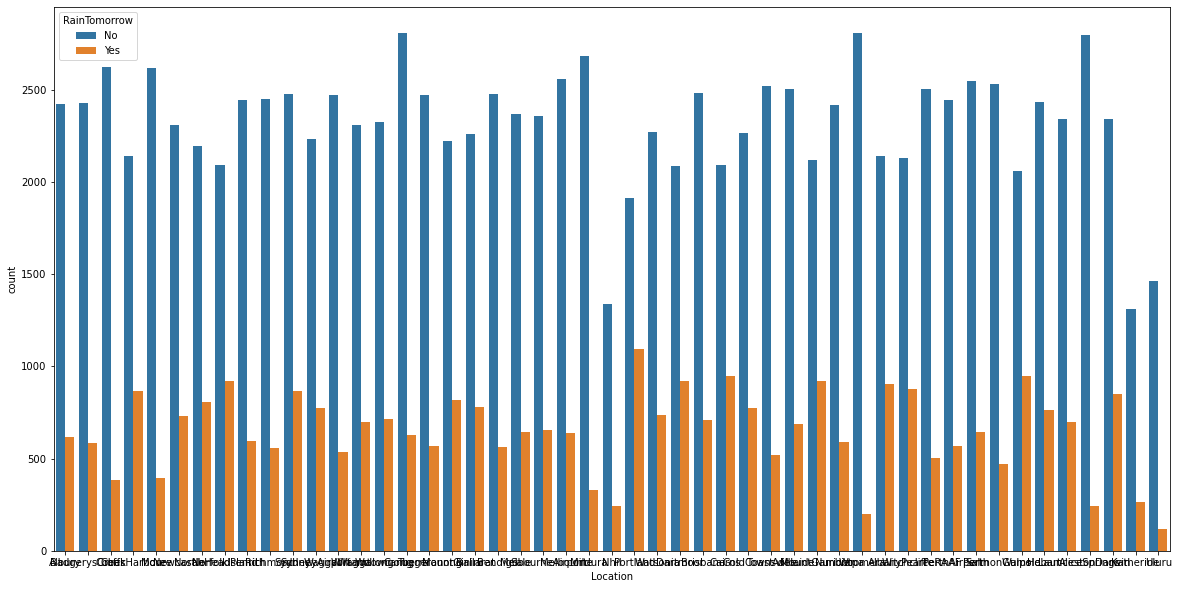

In [124]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="Location", hue="RainTomorrow", data=df)

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

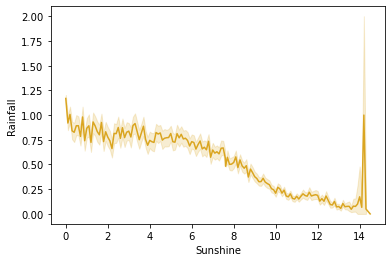

In [125]:
sns.lineplot(data=df,x='Sunshine',y='Rainfall',color='goldenrod')

array([[<AxesSubplot:title={'center':'MinTemp'}>,
        <AxesSubplot:title={'center':'MaxTemp'}>,
        <AxesSubplot:title={'center':'Rainfall'}>,
        <AxesSubplot:title={'center':'Evaporation'}>],
       [<AxesSubplot:title={'center':'Sunshine'}>,
        <AxesSubplot:title={'center':'WindGustSpeed'}>,
        <AxesSubplot:title={'center':'WindSpeed9am'}>,
        <AxesSubplot:title={'center':'WindSpeed3pm'}>],
       [<AxesSubplot:title={'center':'Humidity9am'}>,
        <AxesSubplot:title={'center':'Humidity3pm'}>,
        <AxesSubplot:title={'center':'Pressure9am'}>,
        <AxesSubplot:title={'center':'Pressure3pm'}>],
       [<AxesSubplot:title={'center':'Cloud9am'}>,
        <AxesSubplot:title={'center':'Cloud3pm'}>,
        <AxesSubplot:title={'center':'Temp9am'}>,
        <AxesSubplot:title={'center':'Temp3pm'}>]], dtype=object)

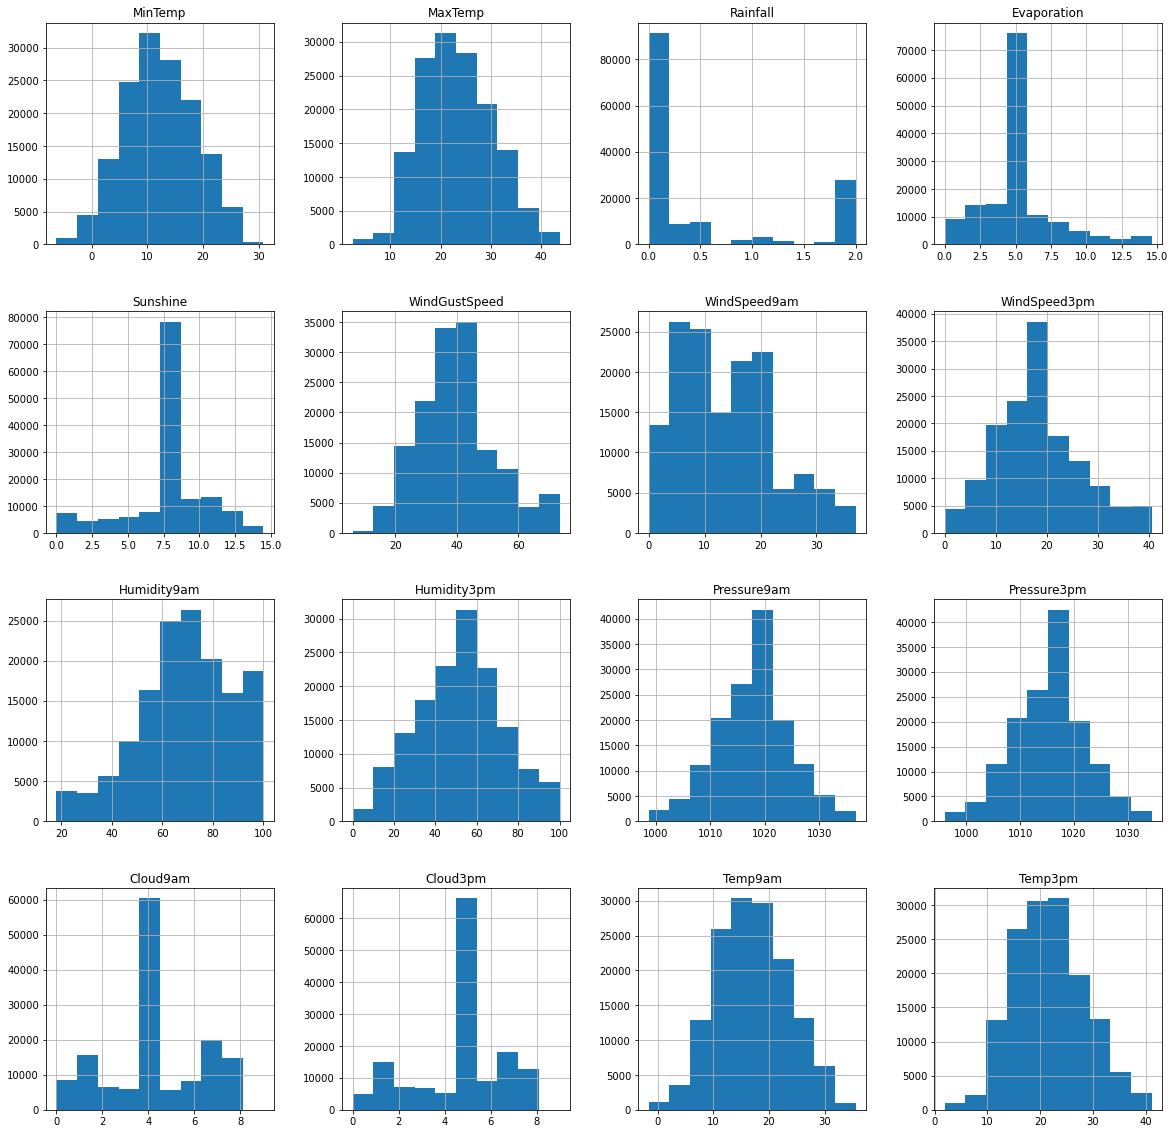

In [126]:
num_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
df[num_features].hist(bins=10,figsize=(20,20))

<span style='font-size:15px;'>&#10145; <b>` Correlation:`</b></span>


    - Correlation is a statistic that helps to measure the strength of relationship between features. 

In [127]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,day
MinTemp,1.000000,0.733392,0.051203,0.404632,0.051295,0.180336,0.177534,0.177176,-0.230718,0.006033,-0.428982,-0.437161,0.062154,0.016724,0.897765,0.699147,0.043007,-0.202744,0.002342
MaxTemp,0.733392,1.000000,-0.255978,0.501465,0.329668,0.073229,0.017140,0.053117,-0.497111,-0.498544,-0.314920,-0.402168,-0.225781,-0.213214,0.879365,0.968905,0.061734,-0.163190,0.000655
Rainfall,0.051203,-0.255978,1.000000,-0.188968,-0.261889,0.151293,0.102499,0.080050,0.387454,0.406205,-0.179751,-0.095155,0.270881,0.234198,-0.114011,-0.260283,-0.014480,0.011964,0.003290
Evaporation,0.404632,0.501465,-0.188968,1.000000,0.339024,0.170903,0.157072,0.113275,-0.421244,-0.318548,-0.248039,-0.269624,-0.168963,-0.167229,0.477917,0.485623,0.060169,-0.024221,-0.005429
Sunshine,0.051295,0.329668,-0.261889,0.339024,1.000000,-0.019597,0.006782,0.041356,-0.349320,-0.443121,0.029821,-0.016637,-0.532497,-0.553853,0.208714,0.347710,0.006072,0.017589,-0.000286
WindGustSpeed,0.180336,0.073229,0.151293,0.170903,-0.019597,1.000000,0.578562,0.659350,-0.214349,-0.028868,-0.424191,-0.381720,0.050920,0.078253,0.154054,0.039421,-0.029014,0.058281,-0.009631
WindSpeed9am,0.177534,0.017140,0.102499,0.157072,0.006782,0.578562,1.000000,0.507874,-0.273399,-0.033036,-0.214427,-0.164884,0.018119,0.039635,0.131738,0.007197,-0.017855,0.051481,-0.008879
WindSpeed3pm,0.177176,0.053117,0.080050,0.113275,0.041356,0.659350,0.507874,1.000000,-0.146602,0.015137,-0.276327,-0.237763,0.041044,0.018156,0.165858,0.031299,-0.029658,0.058906,-0.010331
Humidity9am,-0.230718,-0.497111,0.387454,-0.421244,-0.349320,-0.214349,-0.273399,-0.146602,1.000000,0.658850,0.133181,0.177319,0.354042,0.273774,-0.468540,-0.489627,0.009745,-0.089070,0.015121
Humidity3pm,0.006033,-0.498544,0.406205,-0.318548,-0.443121,-0.028868,-0.033036,0.015137,0.658850,1.000000,-0.024338,0.050405,0.398762,0.406605,-0.216576,-0.555212,-0.009463,-0.018568,0.012813


<AxesSubplot:>

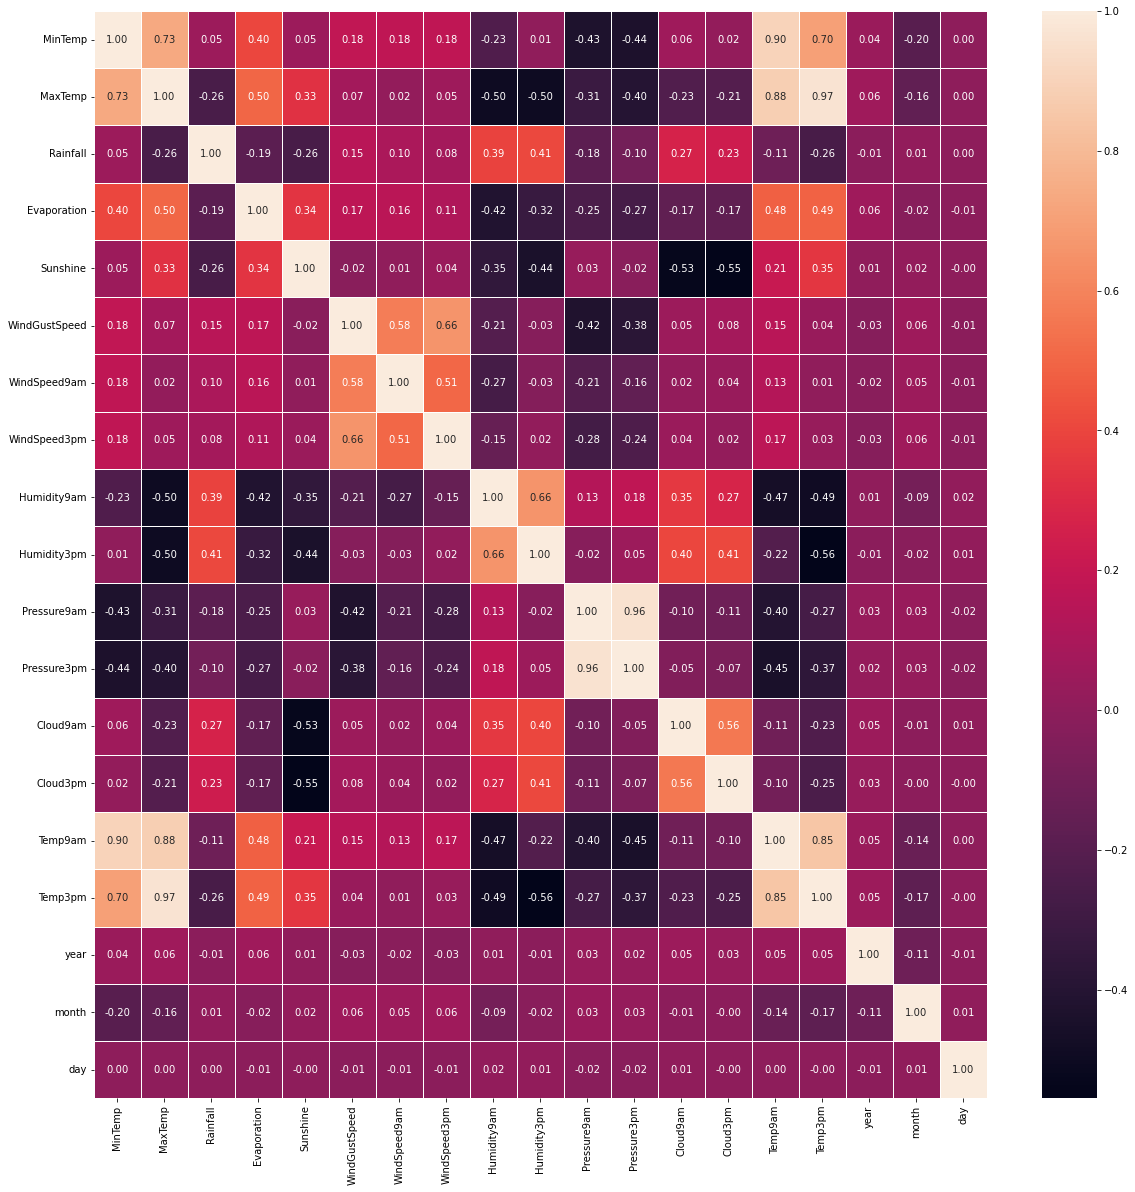

In [128]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),linewidths=0.5,annot=True,fmt=".2f")

In [129]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,5.318667,7.611178,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,5.318667,7.611178,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,5.318667,7.611178,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,5.318667,7.611178,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,5.318667,7.611178,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No,2008,12,5


<br>

<span style='font-size:15px;'>&#10145; <b>`Encoding of Categorical Features`</b></span>

Most Machine Learning Algorithms like Logistic Regression, Support Vector Machines, K Nearest Neighbours etc. can't handle categorical data. Hence, these categorical data needs to converted to numerical data for modelling, which is called as `Feature Encoding`.

In [130]:
categorical_features

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [131]:
# Encoding Categorical Features using replace function:

df['RainToday'].replace({'No':0, 'Yes': 1}, inplace = True)

# pd.get_dummies(df['RainToday'],drop_first = True)

df['RainTomorrow'].replace({'No':0, 'Yes': 1}, inplace = True)

In [132]:
def encode_data(feature_name):
    
    ''' 
    
     function which takes feature name as a parameter and return mapping dictionary to replace(or map) categorical data 
     to numerical data.
     
    '''
    
    mapping_dict = {}
    unique_values = list(df[feature_name].unique())
    for idx in range(len(unique_values)):
        mapping_dict[unique_values[idx]] = idx
    print(mapping_dict)
    return mapping_dict


In [133]:
df['WindGustDir'].replace(encode_data('WindGustDir'),inplace = True)

{'W': 0, 'WNW': 1, 'WSW': 2, 'NE': 3, 'NNW': 4, 'N': 5, 'NNE': 6, 'SW': 7, 'ENE': 8, 'SSE': 9, 'S': 10, 'NW': 11, 'SE': 12, 'ESE': 13, 'E': 14, 'SSW': 15}


In [134]:
df['WindDir9am'].replace(encode_data('WindDir9am'),inplace = True)

{'W': 0, 'NNW': 1, 'SE': 2, 'ENE': 3, 'SW': 4, 'SSE': 5, 'S': 6, 'NE': 7, 'N': 8, 'SSW': 9, 'WSW': 10, 'ESE': 11, 'E': 12, 'NW': 13, 'WNW': 14, 'NNE': 15}


In [135]:
df['WindDir3pm'].replace(encode_data('WindDir3pm'),inplace = True)

{'WNW': 0, 'WSW': 1, 'E': 2, 'NW': 3, 'W': 4, 'SSE': 5, 'ESE': 6, 'ENE': 7, 'NNW': 8, 'SSW': 9, 'SW': 10, 'SE': 11, 'N': 12, 'S': 13, 'NNE': 14, 'NE': 15}


In [136]:
df['Location'].replace(encode_data('Location'), inplace = True)

{'Albury': 0, 'BadgerysCreek': 1, 'Cobar': 2, 'CoffsHarbour': 3, 'Moree': 4, 'Newcastle': 5, 'NorahHead': 6, 'NorfolkIsland': 7, 'Penrith': 8, 'Richmond': 9, 'Sydney': 10, 'SydneyAirport': 11, 'WaggaWagga': 12, 'Williamtown': 13, 'Wollongong': 14, 'Canberra': 15, 'Tuggeranong': 16, 'MountGinini': 17, 'Ballarat': 18, 'Bendigo': 19, 'Sale': 20, 'MelbourneAirport': 21, 'Melbourne': 22, 'Mildura': 23, 'Nhil': 24, 'Portland': 25, 'Watsonia': 26, 'Dartmoor': 27, 'Brisbane': 28, 'Cairns': 29, 'GoldCoast': 30, 'Townsville': 31, 'Adelaide': 32, 'MountGambier': 33, 'Nuriootpa': 34, 'Woomera': 35, 'Albany': 36, 'Witchcliffe': 37, 'PearceRAAF': 38, 'PerthAirport': 39, 'Perth': 40, 'SalmonGums': 41, 'Walpole': 42, 'Hobart': 43, 'Launceston': 44, 'AliceSprings': 45, 'Darwin': 46, 'Katherine': 47, 'Uluru': 48}


In [137]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,0,13.4,22.9,0.6,5.318667,7.611178,0,44.0,0,0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0,2008,12,1
1,0,7.4,25.1,0.0,5.318667,7.611178,1,44.0,1,1,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0,2008,12,2
2,0,12.9,25.7,0.0,5.318667,7.611178,2,46.0,0,1,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0,2008,12,3
3,0,9.2,28.0,0.0,5.318667,7.611178,3,24.0,2,2,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0,2008,12,4
4,0,17.5,32.3,1.0,5.318667,7.611178,0,41.0,3,3,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0,2008,12,5


<br>
<br>

`Spliting data into input features and label`

In [138]:
X = df.drop(['RainTomorrow'],axis=1)
y = df['RainTomorrow']

<span style='font-size:15px;'>&#10145; <b>`Feature Importance:`</b></span>

    - Machine Learning Model performance depends on features that are used to train a model. 
    - Feature importance describes which features are relevant to build a model. 
    - Feature Importance refers to the techniques that assign a score to input/label features based on how useful they are  at predicting a target variable. Feature importance helps in Feature Selection.


In [139]:
# finding feature importance using ExtraTreesRegressor:

from sklearn.ensemble import ExtraTreesRegressor
etr_model = ExtraTreesRegressor()
etr_model.fit(X,y)

ExtraTreesRegressor()

In [140]:
etr_model.feature_importances_

array([0.03460301, 0.03000337, 0.02868077, 0.03732791, 0.02339482,
       0.04208684, 0.03002661, 0.0569996 , 0.03052863, 0.0316941 ,
       0.03102226, 0.03229249, 0.03780173, 0.20751843, 0.03651335,
       0.04940001, 0.02412824, 0.03566888, 0.02802304, 0.02862391,
       0.05000954, 0.03098853, 0.03018858, 0.03247533])

<AxesSubplot:>

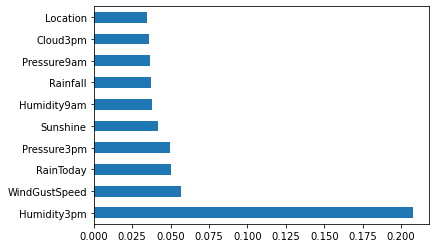

In [141]:
# visualizing feature importance using bar graph:

feature_imp = pd.Series(etr_model.feature_importances_,index=X.columns)
feature_imp.nlargest(10).plot(kind='barh')

In [142]:
feature_imp

Location         0.034603
MinTemp          0.030003
MaxTemp          0.028681
Rainfall         0.037328
Evaporation      0.023395
Sunshine         0.042087
WindGustDir      0.030027
WindGustSpeed    0.057000
WindDir9am       0.030529
WindDir3pm       0.031694
WindSpeed9am     0.031022
WindSpeed3pm     0.032292
Humidity9am      0.037802
Humidity3pm      0.207518
Pressure9am      0.036513
Pressure3pm      0.049400
Cloud9am         0.024128
Cloud3pm         0.035669
Temp9am          0.028023
Temp3pm          0.028624
RainToday        0.050010
year             0.030989
month            0.030189
day              0.032475
dtype: float64

## `5) Split Data into Training and Testing Set`  <a class="anchor" id=""></a>

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [144]:
print("Length of Training Data: {}".format(len(X_train)))
print("Length of Testing Data: {}".format(len(X_test)))

Length of Training Data: 116368
Length of Testing Data: 29092


## `6) Feature Scaling`  <a class="anchor" id=""></a>

In [145]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [146]:
X_test = scaler.transform(X_test)

`Save the Scaler object to Standardize Real Time Data feeded by users for prediction`

In [147]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

## `7) Model Building`  <a class="anchor" id=""></a>
    - Model Training
    - Model Testing 
    - Evaluating Model Performance using Accuracy, Confusion Matrix, Classification Report, RUC-AUC curve
    - Finding whether model performance can be improved using Cross Validation Score

In [148]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

<span style='font-size:15px;'><b>`(i) Logistic Regression`</b></span>

`Model Training:`

In [149]:
from sklearn.linear_model import LogisticRegression

In [150]:
start_time = time.time()
classifier_logreg = LogisticRegression(solver='liblinear', random_state=0)
classifier_logreg.fit(X_train, y_train)
end_time = time.time()

In [151]:
print("Time Taken to train: {}".format(end_time - start_time))

Time Taken to train: 0.7270050048828125


`Model Testing:`

In [152]:
y_pred = classifier_logreg.predict(X_test)

In [153]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [154]:
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))

Accuracy Score: 0.8444933315000688


`Checking for Overfitting and Under Fitting:`

In [155]:
print("Train Data Score: {}".format(classifier_logreg.score(X_train, y_train)))
print("Test Data Score: {}".format(classifier_logreg.score(X_test, y_test)))

Train Data Score: 0.8437714835693662
Test Data Score: 0.8444933315000688


_`Accuracy Score of Training and Testing Data is comparable and almost equal. So, there is no question of Underfitting and Over Fitting. And model is generalizing well for new unseen data.`_

In [156]:
# confusion Matrix:

print("Confusion Matrix:")
print("\n",confusion_matrix(y_test,y_pred))

Confusion Matrix:

 [[21536  1190]
 [ 3334  3032]]


In [157]:
# Classification Report:

print("classification_report:")
print("\n",classification_report(y_test,y_pred))

classification_report:

               precision    recall  f1-score   support

           0       0.87      0.95      0.90     22726
           1       0.72      0.48      0.57      6366

    accuracy                           0.84     29092
   macro avg       0.79      0.71      0.74     29092
weighted avg       0.83      0.84      0.83     29092



In [158]:
# predicting probabilities:

y_pred_logreg_proba = classifier_logreg.predict_proba(X_test)

In [159]:
# Finding True Positive Rate(tpr), False Positive Rate(fpr), threshold values to plot ROC curve

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_proba[:,1])

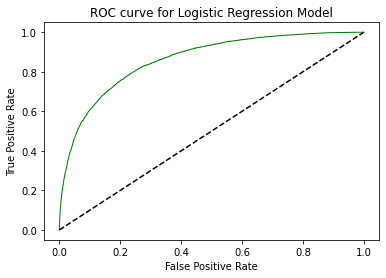

In [160]:
# Plotting ROC curve:

plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Logistic Regression Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

In [161]:
# finding ROC-AUC score:

from sklearn.metrics import roc_auc_score
print('ROC AUC Scores: {}'.format(roc_auc_score(y_test, y_pred)))

ROC AUC Scores: 0.7119586532221237


<br>

`Finding whether model performance can be improved using Cross Validation Score:`

In [162]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier_logreg, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.84338747 0.84235628 0.84691072 0.84067374 0.84359558]


In [163]:
print('Average cross-validation score: {}'.format(scores.mean()))

Average cross-validation score: 0.8433847578355673


_`The mean accuracy score of cross validation is almost same like original model accuracy score which is 0.8445. So, accuracy of model may not be improved using Cross-validation.`_

<hr style="height:1px">

<span style='font-size:15px;'><b>`(ii) Cat Boost`</b></span>

In [164]:
from catboost import CatBoostClassifier

ModuleNotFoundError: No module named 'catboost'

`Model Training:`

In [ ]:
start_time = time.time()
cat_classifier = CatBoostClassifier(iterations=2000, eval_metric = "AUC")
cat_classifier.fit(X_train, y_train)
end_time = time.time()

In [ ]:
print("Time Taken to train: {}".format(end_time - start_time))

`Model Testing:`

In [ ]:
y_pred_cat = cat_classifier.predict(X_test)

In [ ]:
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred_cat)))

`Checking for Overfitting and Under Fitting:`

In [ ]:
print("Train Data Score: {}".format(cat_classifier.score(X_train, y_train)))
print("Test Data Score: {}".format(cat_classifier.score(X_test, y_test)))

_`Accuracy Score of Training and Testing Data is comparable and almost equal. So, there is no question of Underfitting and Over Fitting. And model is generalizing well for new unseen data.`_

In [ ]:
# Confusion Matrix:

print("Confusion Matrix:")
print("\n",confusion_matrix(y_test,y_pred_cat))

In [ ]:
# classification Report:

print("classification_report:")
print("\n",classification_report(y_test,y_pred_cat))

In [ ]:
# predicting the probabilities:

y_pred_cat_proba = cat_classifier.predict_proba(X_test)

In [ ]:
# Finding True Positive Rate(tpr), False Positive Rate(fpr), threshold values to plot ROC curve  

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_cat_proba[:,1])

In [ ]:
# plotting ROC Curve:

plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Cat Boost Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
#finding ROC AUC Scores:

from sklearn.metrics import roc_auc_score
print('ROC AUC Scores: {}'.format(roc_auc_score(y_test, y_pred_cat)))

<br>

`Finding whether model performance can be improved using Cross Validation Score:`

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(cat_classifier, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

In [ ]:
print('Average cross-validation score: {}'.format(scores.mean()))

_`The mean accuracy score of cross validation is almost same like original model accuracy score which is 0.8647050735597415. So, accuracy of model may not be improved using Cross-validation.`_

<hr style="height:1px">

<span style='font-size:15px;'><b>`(iii) Random Forest`</b></span>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

`Model Training:`

In [ ]:
start_time = time.time()
classifier_rf=RandomForestClassifier()
classifier_rf.fit(X_train,y_train)
end_time = time.time()

In [ ]:
print("Time Taken to train: {}".format(end_time - start_time))

`Model Testing:`

In [ ]:
y_pred_rf = classifier_rf.predict(X_test)

In [ ]:
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred_rf)))

`Checking for Overfitting and Under Fitting:`

In [ ]:
print("Train Data Score: {}".format(classifier_rf.score(X_train, y_train)))
print("Test Data Score: {}".format(classifier_rf.score(X_test, y_test)))

_`Accuracy score for Training Set is almost 1 or 100%, which is quite uncommon. And testing accuracy is 0.85. It seems like model is overfitting, because the generalization for unseen data is not that accurate, when compared with seen data and difference between training - testing accuracy is not minimum.`_

## `8) Results and Conclusion:`  <a class="anchor" id=""></a>

`Best Models in terms of accuracy (In my Experiment):`

    1) Cat Boost Model
    2) Logistic Regression
    3) Random Forest
    
`Best Models in terms of Computation Time (In my Experiment):`

    1) Logistic Regression
    2) Random Forest
    3) Cat Boost Model
        

`Conclusion:`

The accuracy score of Cat Boost Model is high when compared with accuracy scores of Logistic Regression and Random Forest. But cat Boost model consumes lot of time to train the model.

In terms of computation time and Accuracy score, logistic Regression model is doing job.


## `9) Saving Classifier Object into Pickle File:`  <a class="anchor" id="10"></a>

In [ ]:
with open('logreg.pkl', 'wb') as file:
    pickle.dump(classifier_logreg, file)

In [ ]:
with open('catboostclassifier.pkl', 'wb') as file:
    pickle.dump(cat_classifier, file)

<br>
<h1 align="center">. . . . . .</h1>
